# Задача Регрессии


## 1. Выбор начальных условий

### a. Набор данных

Датасет https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv.

Датасет содержит информацию о бронировании авиабилетов с вебсайта "Ease My Trip". Датасет включает данные о бронированиях авиабилетов между шестью крупнейшими городами Индии за период с 11 февраля по 31 марта 2022 года. Он содержит 300261 запись и 11 характеристик.

- Airline — авиакомпания (категориальная переменная с 6 значениями).
- Flight — код рейса (категориальная переменная).
- Source City — город отправления (категориальная переменная с 6 уникальными городами).
- Departure Time — время отправления (категориальная переменная с 6 уникальными значениями).
- Stops — количество остановок между городами (категориальная переменная с 3 значениями).
- Arrival Time — время прибытия (категориальная переменная с 6 уникальными значениями).
- Destination City — город назначения (категориальная переменная с 6 уникальными городами).
- Class — класс билета (категориальная переменная: Business и Economy).
- Duration — продолжительность полета (непрерывная переменная, выраженная в часах).
- Days Left — количество дней до вылета (рассчитывается как разница между датой путешествия и датой бронирования).
- Price — целевая переменная — стоимость билета.

In [ ]:
from google.colab import files

# Загрузка kaggle.json
uploaded = files.upload()

# Перемещение токена в нужную директорию
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Установка библиотеки Kaggle
!pip install -q kaggle

# Проверка установки
!kaggle datasets list

ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset                    Customer Shopping (Latest Trends) Dataset            76KB  2024-11-23 15:26:12          14317        277  1.0              
hopesb/student-depression-dataset                                      Student Depression Dataset.                         454KB  2024-11-22 17:56:03          11031        143  1.0              
chadwambles/supermarket-sales                                          SuperMarket Sales                                    36KB  2024-12-17 23:35:52           1417         28  0.88235295       
adarsh0806/influencer-mer

Загрузка датасета

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Инициализируем API
api = KaggleApi()
api.authenticate()

# Скачать датасет
dataset = "shubhambathwal/flight-price-prediction"
api.dataset_download_files(dataset, path='Downloads2', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


In [ ]:
import pandas as pd

data2 = pd.read_csv('Downloads2/Clean_Dataset.csv')
data2.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### b. Метрики качества

В качестве метрик для задачи регрессии будем использовать: Среднеквадратичную ошибку (MSE, Mean Squared Error) и Коэффициент детерминации (𝑅^2 R-squared)

Данные метрики подойдут поскольку R-squared удобен для оценки общей точности модели, особенно при сравнении нескольких моделей, а MSE сильнее штрафует большие ошибки из-за возведения в квадрат. Подходит, если большие отклонения критически важны.

# 2. Создание бейзлайна и оценка качества


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def print_evaluation(y_test, y_pred):
    print("MSE error")
    print(mean_squared_error(y_test, y_pred))
    print("R^2 score")
    print(r2_score(y_test, y_pred))

## a. KNN


In [ ]:
# Преобразование цены с использованием логарифма
data2['price'] = np.log1p(data2['price'])

# Удаляем ненужные столбцы
data2 = data2.drop(columns=["flight"])

# Преобразование категориальных переменных в числовые
categorical_features = ['airline', 'source_city', 'departure_time',
                        'stops', 'arrival_time', 'destination_city', 'class']
data2 = pd.get_dummies(data2, columns=categorical_features, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = data2.drop(columns=["price"])
y = data2["price"]

# Разделение данных на обучающую и тестовую выборки
X_train2, X_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train2, y_train)

y_pred = knn.predict(X_test2)

# Оценка модели
print("MSE error")
print(mean_squared_error(y_test, y_pred))
print("R^2 score")
print(r2_score(y_test, y_pred))

MSE error
0.014833505650911858
R^2 score
0.9880234144898233


## b. Логистическая и линейная регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train2, y_train)

y_pred = logistic_model.predict(X_test2)

print("MSE error:")
print(mean_squared_error(y_test, y_pred))
print("R^2 score:")
print(r2_score(y_test, y_pred))

Распределение классов:
price_category
2    75584
1    75117
0    75073
3    74379
Name: count, dtype: int64
MSE error:
0.5235794839333011
R^2 score:
0.5797394349536116


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train2, y_train)

y_pred = linear_model.predict(X_test2)

print("MSE error:")
print(mean_squared_error(y_test, y_pred))
print("R^2 score:")
print(r2_score(y_test, y_pred))

MSE error:
0.28993539275107155
R^2 score:
0.7672781006063367


## c. Решающее дерево

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train2, y_train)

y_pred3 = tree_model.predict(X_test2)

print("MSE error:")
print(mean_squared_error(y_test, y_pred3))
print("R^2 score:")
print(r2_score(y_test, y_pred3))

MSE error:
0.0718128966700538
R^2 score:
0.9423580765513353


## d. Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train2, y_train)

y_pred4 = forest_model.predict(X_test2)

print_evaluation(y_test, y_pred4)

MSE error
0.045570433609301866
R^2 score
0.9634220652914394


## e. Градиентный бустинг

In [ ]:
gboost_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gboost_model.fit(X_train2, y_train)

y_pred5 = gboost_model.predict(X_test2)
print_evaluation(y_test, y_pred5)

MSE error
0.18869734862399862
R^2 score
0.8485386521264472


# 3. Улучшение бейзлайна


Выполним препроцессинг данных, чтобы улучшить бейзлайн. Некоторую обратку я уже делал в пункте 2, потому что без нее не получалось выполнить обучение, здесь я подробнее опишу, что делал и что я добавил.

In [ ]:
import pandas as pd

data = pd.read_csv('Downloads2/Clean_Dataset.csv')
data.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
import pandas as pd

data4 = pd.read_csv('Downloads2/Clean_Dataset.csv')
data4.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data4.isna().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
print(data4.columns)

Index(['Unnamed: 0', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'class_Economy'],
      dtype='object')


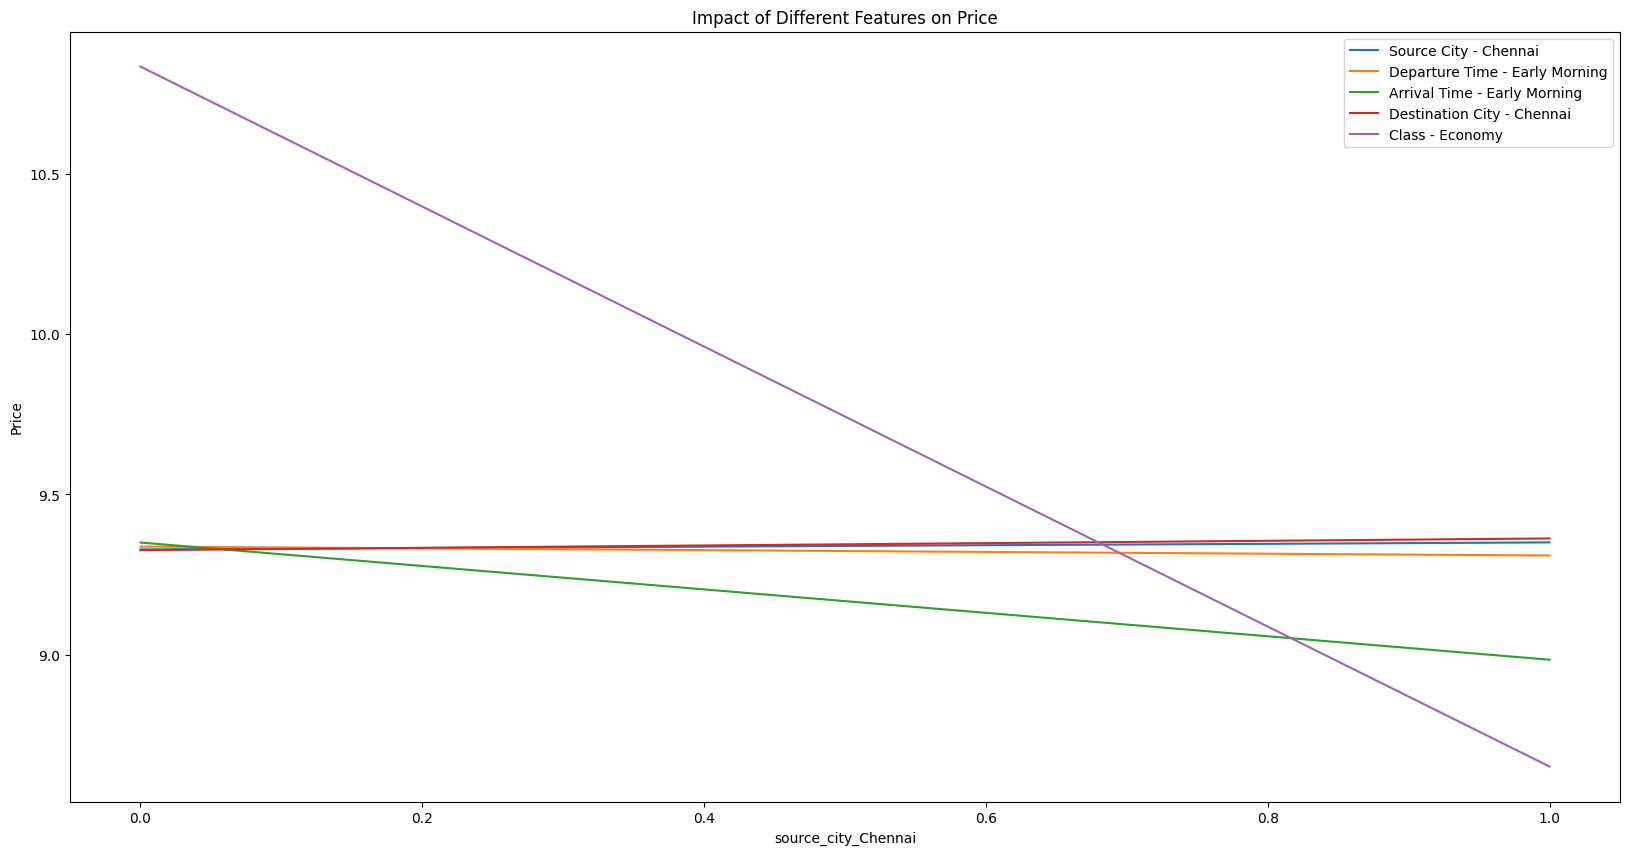

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Агрегируем данные по каждому признаку и вычисляем среднее значение цены
source_city_avg = data4.groupby("source_city_Chennai")["price"].mean().reset_index()
departure_time_avg = data4.groupby("departure_time_Early_Morning")["price"].mean().reset_index()
arrival_time_avg = data4.groupby("arrival_time_Early_Morning")["price"].mean().reset_index()
destination_city_avg = data4.groupby("destination_city_Chennai")["price"].mean().reset_index()
class_avg = data4.groupby("class_Economy")["price"].mean().reset_index()

plt.figure(figsize=(20, 10))

# Город, откуда проиходит отправление
sns.lineplot(data=source_city_avg, x="source_city_Chennai", y="price", label="Source City - Chennai")

# Время отправления
sns.lineplot(data=departure_time_avg, x="departure_time_Early_Morning", y="price", label="Departure Time - Early Morning")

# Время прибытия
sns.lineplot(data=arrival_time_avg, x="arrival_time_Early_Morning", y="price", label="Arrival Time - Early Morning")

# Город назначения
sns.lineplot(data=destination_city_avg, x="destination_city_Chennai", y="price", label="Destination City - Chennai")

# Класс
sns.lineplot(data=class_avg, x="class_Economy", y="price", label="Class - Economy")

# Настройка графика
plt.ylabel("Price")
plt.title("Impact of Different Features on Price")
plt.legend()
plt.show()


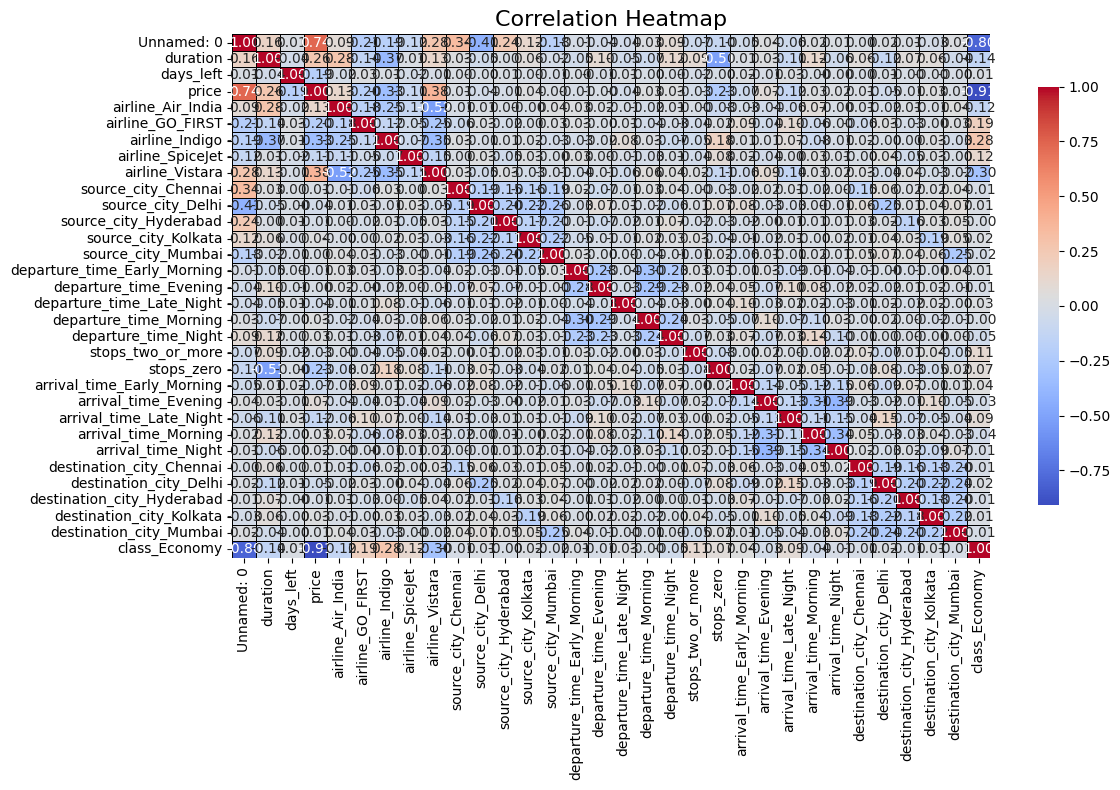

In [ ]:
plt.figure(figsize=(12, 8))  #
sns.heatmap(data4.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()

plt.show()

Удаляем ненужные столбцы

In [ ]:

data = data.drop(columns=["flight"])

Делаем преобразование категориальных переменных в числовые

In [ ]:
categorical_features = ['airline', 'source_city', 'departure_time',
                        'stops', 'arrival_time', 'destination_city', 'class']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

Преобразование цены с использованием логарифма



In [ ]:
data['price'] = np.log1p(data['price'])

Масштабирование числовых признаков

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

В совокупности:
- Логарифмирование помогает сгладить распределение целевой переменной и уменьшить влияние выбросов.
- Удаление ненужных признаков помогает уменьшить размерность и устранить шум, что делает модель более эффективной.
- Преобразование категориальных признаков позволяет использовать важную информацию, заключенную в категориальных переменных.
- Масштабирование признаков помогает улучшить сходимость алгоритмов и предотвращает доминирование признаков с большими значениями.

## a. KNN


In [ ]:

data['price'] = np.log1p(data['price'])


data = data.drop(columns=["flight"])


categorical_features = ['airline', 'source_city', 'departure_time',
                        'stops', 'arrival_time', 'destination_city', 'class']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=["price"])
y = data["price"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


print("MSE error:")
print(mean_squared_error(y_test, y_pred))
print("R^2 score:")
print(r2_score(y_test, y_pred))

MSE error:
0.032687925729312235
R^2 score:
0.97360774001368


## b. Логистическая и линейная регрессия

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


y_pred = linear_model.predict(X_test_scaled)

print(mean_squared_error(y_test, y_pred))
print("R^2 score:")
print(r2_score(y_test, y_pred))


MSE error:
0.1037030467742354
R^2 score:
0.9162700688167309


In [ ]:

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


y_pred = linear_model.predict(X_test_scaled)

print(mean_squared_error(y_test, y_pred))
print("R^2 score:")
print(r2_score(y_test, y_pred))

MSE error:
0.10370304677423536
R^2 score:
0.9162700688167309


In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

print("MSE error:")
print(mean_squared_error(y_test, y_pred))
print("R^2 score:")
print(r2_score(y_test, y_pred))

MSE error:
0.5235794839333011
R^2 score:
0.5797394349536116


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## c. Решающее дерево

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

y_pred3 = tree_model.predict(X_test_scaled)
print_evaluation(y_test, y_pred3)

MSE error
0.07169629025003749
R^2 score
0.9424516728083848


## d. Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train_scaled, y_train)

y_pred4 = forest_model.predict(X_test_scaled)

print_evaluation(y_test, y_pred4)

MSE error
0.045597031533707574
R^2 score
0.9634007159852064


## e. Градиентный бустинг

In [ ]:
gboost_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gboost_model.fit(X_train_scaled, y_train)

y_pred5 = gboost_model.predict(X_test_scaled)
print_evaluation(y_test, y_pred5)

MSE error
0.18869805668460402
R^2 score
0.8485380837887654


**К сожалению, масштабирование признаков не всегда помогает улучшить бейзлайн моделей. Однако основная предобработка заключается в логарифмировании, которое помогает избежать влияния смещенных значений. В итоге результаты обучения могут быть удовлетворительными.**

# Имплементация алгоритмов машинного обучения